## Observations and Insights 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_study_results)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = mouse_study_results[mouse_study_results.duplicated(['Mouse ID','Timepoint'])]
duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results = mouse_study_results.drop_duplicates(subset = ['Mouse ID','Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_results)

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_mouse = mouse_study_results.groupby(by=['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_mouse = grouped_mouse['Tumor Volume (mm3)'].mean()
median_mouse = grouped_mouse['Tumor Volume (mm3)'].median()
variance_mouse = grouped_mouse['Tumor Volume (mm3)'].var()
std_mouse = grouped_mouse['Tumor Volume (mm3)'].std()
sem_mouse = grouped_mouse['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.merge(std_mouse, sem_mouse, on = 'Drug Regimen', suffixes =('_std','_sem'))
summary_stats = pd.merge(summary_stats, mean_mouse, on = 'Drug Regimen')
summary_stats = pd.merge(summary_stats, median_mouse, on = 'Drug Regimen', suffixes =('_mean','_median'))
summary_stats = pd.merge(summary_stats, variance_mouse, on = 'Drug Regimen')
summary_stats.columns = ['Tumor Volume (mm3) standard deviation', 'Tumor Volume (mm3) SEM', 'Tumor Volume (mm3) mean',
                         'Tumor Volume (mm3) median', 'Tumor Volume (mm3) variance']
                         
summary_stats


,Tumor Volume (mm3) standard deviation,Tumor Volume (mm3) SEM,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance
Drug Regimen,,,,,
Capomulin,4.994774,0.329346,40.675741,41.557809,24.947764
Ceftamin,6.268188,0.469821,52.591172,51.776157,39.290177
Infubinol,6.567243,0.492236,52.884795,51.820584,43.128684
Ketapril,8.279709,0.603860,55.235638,53.698743,68.553577
Naftisol,8.134708,0.596466,54.331565,52.509285,66.173479
Placebo,7.821003,0.581331,54.033581,52.288934,61.168083
Propriva,6.568014,0.525862,52.393463,50.909965,43.138803
Ramicane,4.846308,0.320955,40.216745,40.673236,23.486704
Stelasyn,7.710419,0.573111,54.233149,52.431737,59.450562


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats.agg(['mean'])

,Tumor Volume (mm3) standard deviation,Tumor Volume (mm3) SEM,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance
mean,6.815695,0.500938,50.983236,49.948493,47.787119


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = grouped_mouse.count()
regimen_count = regimen_count['Mouse ID']
regimen_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

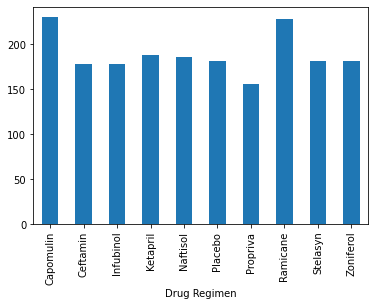

In [48]:
regimen_count.plot(kind = 'bar', x = 'Drug Regimen')
plt.

In [44]:

measurements = grouped_mouse.count()
measurements = measurements['Mouse ID'].to_frame()
measurements = measurements.reset_index()
measurements

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0, 0.5, 'Number of Measurements')

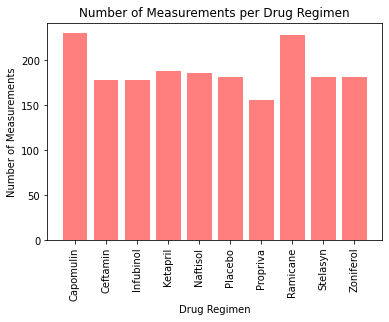

In [46]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(measurements))
tick_locations = [value for value in x_axis]
plt.figure()
plt.bar(x_axis, measurements['Mouse ID'], color = 'r', alpha = 0.5, align = 'center')
plt.xticks(tick_locations, measurements['Drug Regimen'], rotation = 'vertical')
plt.title('Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
